In [ ]:
# Step 1: Install necessary libraries
pip install nltk matplotlib seaborn pandas requests


  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.3-cp313-cp313-win_amd64.whl.metadata (37 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.3-cp313-cp313-win_amd64.whl (107 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Using cached certifi-2025.8.3-py3-none-any.whl (161 kB)

   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   -------------------------

In [2]:
# Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
# Step 3: Load World Bank Population Data (replace with the actual dataset path)
# For this example, we are assuming the dataset is in CSV format
# You can replace this with your own path or URL

# Example population dataset (Replace this with the actual dataset)
population_data = {
    'Country': ['Country A', 'Country B', 'Country C', 'Country D'],
    'Year': [2020, 2020, 2020, 2020],
    'Population': [1000000, 5000000, 12000000, 800000]
}
df_population = pd.DataFrame(population_data)

# Display population data
df_population.head()


,Country,Year,Population
0,Country A,2020,1000000
1,Country B,2020,5000000
2,Country C,2020,12000000
3,Country D,2020,800000


In [4]:
# Step 4: Sentiment Analysis on related text data (population growth discussions)
# Example text data related to population growth or challenges
text_data = [
    "The population is growing rapidly, we need more resources!",
    "This country is facing a decline in population, which is a major issue.",
    "Population growth is stabilizing, which is good for sustainable development.",
    "Overpopulation is a growing concern, leading to many environmental issues.",
    "Population is declining in many developed nations, which impacts the economy."
]

# Initialize SentimentIntensityAnalyzer (VADER)
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment based on compound score
def get_sentiment(text):
    sentiment_score = sid.polarity_scores(text)
    compound_score = sentiment_score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the text data
sentiments = [get_sentiment(text) for text in text_data]

# Create a DataFrame to store text and sentiment classification
df_sentiment = pd.DataFrame({
    'Text': text_data,
    'Sentiment': sentiments
})

# Display sentiment analysis results
df_sentiment.head()  # Show the sentiment classification results


,Text,Sentiment
0,"The population is growing rapidly, we need mor...",Positive
1,This country is facing a decline in population...,Neutral
2,"Population growth is stabilizing, which is goo...",Positive
3,"Overpopulation is a growing concern, leading t...",Positive
4,Population is declining in many developed nati...,Neutral


C:\Users\User\AppData\Local\Temp\ipykernel_22388\3013485817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sentiment, x='Sentiment', palette='viridis')


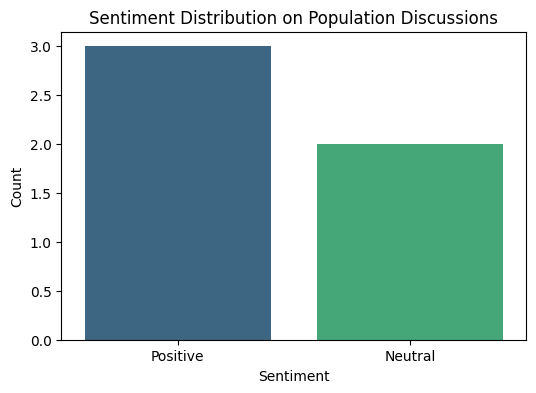

Positive Sentiment Count: 3
Negative Sentiment Count: 0
Neutral Sentiment Count: 2


In [5]:
# Step 5: Visualize Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_sentiment, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution on Population Discussions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Print sentiment counts
positive_count = df_sentiment[df_sentiment['Sentiment'] == 'Positive'].shape[0]
negative_count = df_sentiment[df_sentiment['Sentiment'] == 'Negative'].shape[0]
neutral_count = df_sentiment[df_sentiment['Sentiment'] == 'Neutral'].shape[0]

print(f"Positive Sentiment Count: {positive_count}")
print(f"Negative Sentiment Count: {negative_count}")
print(f"Neutral Sentiment Count: {neutral_count}")


C:\Users\User\AppData\Local\Temp\ipykernel_22388\3567622604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_population, x='Country', y='Population', palette='Blues')


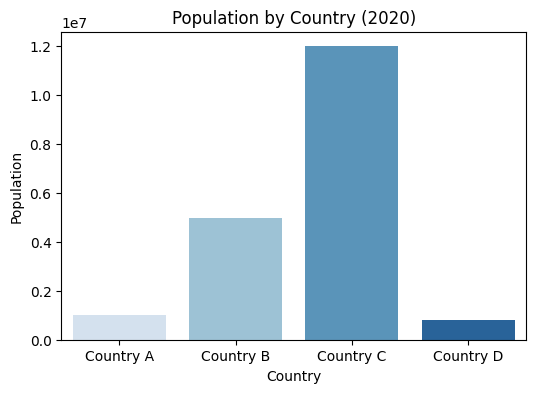

In [6]:
# Step 6: Population analysis - Visualize population by country
plt.figure(figsize=(6,4))
sns.barplot(data=df_population, x='Country', y='Population', palette='Blues')
plt.title('Population by Country (2020)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.show()


In [7]:
# Step 7: Apply insights from sentiment analysis for business decisions
if negative_count > positive_count:
    print("Focus on addressing negative feedback in your marketing strategy.")
else:
    print("Leverage positive feedback in promotional campaigns.")


Leverage positive feedback in promotional campaigns.
